# Fashion mnist  - AE for recommendation

1-phase : 

fashion mnist(28*28) 이미지를 autoencoder모델로 2차원 인코딩시킨 후, 각 클래스별 분포를 확인함

2-phase :

2-dim 인코딩된 데이터로 아이템간 유사도 측정을 수행함


3-phase :

실제 패션 쇼핑몰의 이미지 데이터를 크롤링하여 위 추천알고리즘을 적용
아이템 이미지들를 AE모델로 2-dim 인코딩한 후, 유사도 계산으로 유사한 아이템을 추천

_____________

written by yjucho1(https://github.com/yjucho1/fashion_mnist)


In [1]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 2  

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.5682 - val_loss: 0.5100
Epoch 2/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.4861 - val_loss: 0.4603
Epoch 3/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.4490 - val_loss: 0.4422
Epoch 4/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.4379 - val_loss: 0.4355
Epoch 5/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.4329 - val_loss: 0.4320
Epoch 6/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.4301 - val_loss: 0.4298
Epoch 7/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.4281 - val_loss: 0.4281
Epoch 8/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.4266 - val_loss: 0.4267
Epoch 9/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.425

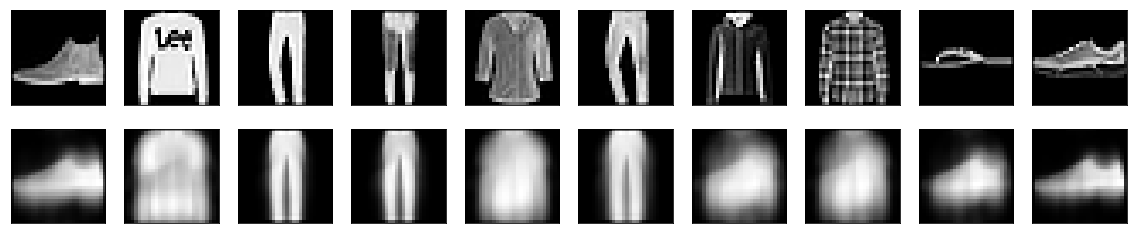

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
   
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


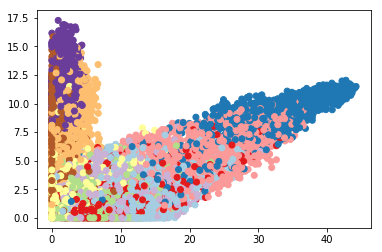

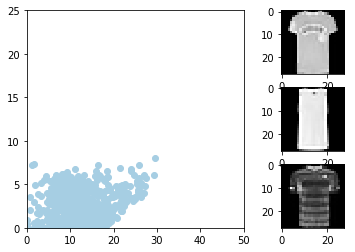

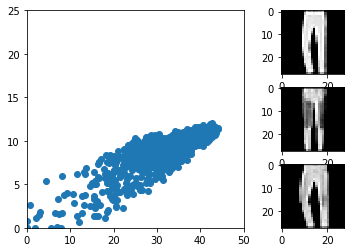

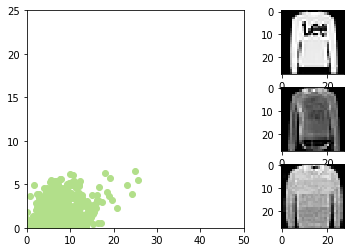

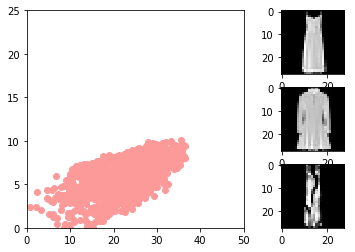

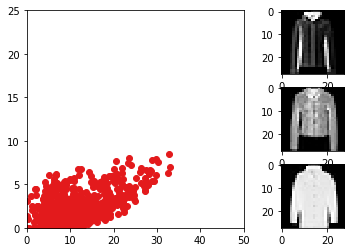

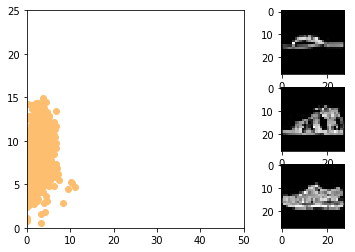

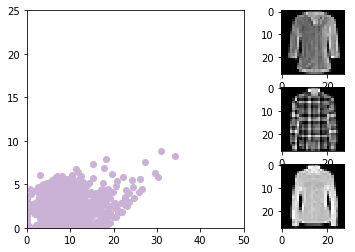

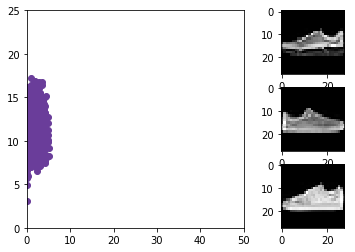

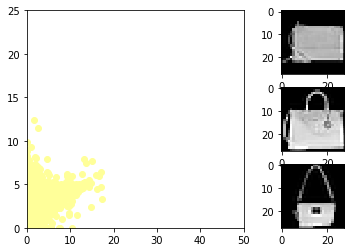

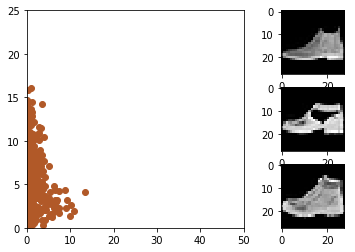

In [26]:
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1], c=y_test, cmap="Paired")
plt.show()

color_list = plt.cm.Paired(np.linspace(0, 1, 10))

gridspec.GridSpec(3,3)

for i in range(10):
    ind = np.where(y_test==i)[0]
    plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
    plt.scatter(encoded_imgs[ind,0],encoded_imgs[ind,1], c=color_list[i,:])
    plt.xlim(0,50)
    plt.ylim(0,25)
    plt.subplot2grid((3,3), (0,2))
    plt.imshow(x_test[ind[0]].reshape(28,28))
    plt.subplot2grid((3,3), (1,2))
    plt.imshow(x_test[ind[1]].reshape(28,28))
    plt.subplot2grid((3,3), (2,2))
    plt.imshow(x_test[ind[2]].reshape(28,28))
    plt.show()
    